In [1]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline
import matplotlib

In [2]:
import os
os.chdir('/home/lds/DSL/Github/dsone13/data')

font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = matplotlib.font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# Import Data

In [103]:
naver = pd.read_csv('naver_movie.csv').drop('Unnamed: 0', axis=1)
merged = pd.read_csv('merged_reorder.csv').drop('Unnamed: 0', axis=1)
daum = pd.read_csv('daum_movie.csv')
cine21 = pd.read_csv('tohowmany.csv')

In [109]:
cine21 = cine21[['제목_x', '연도', '국가', '등급', '장르', '상영시간_x', '개봉일', '누적관객',
       '감독', '출연자', '네티즌', '전문가', '네티즌수', '전문가수', '제목원문']]

In [296]:
gdp = pd.read_excel('GDP.xls')
gdp = pd.DataFrame({'분기': gdp.iloc[1,1:], '명목GDP': gdp.iloc[2,1:], '실질GDP성장률' : gdp.iloc[3,1:]}).reset_index().drop('index', axis=1)
gdp.분기 = gdp.분기.apply(lambda x: x[:4]+'-'+x[-3]) 

In [118]:
merged

,제목,영화코드_y,영화코드_x,네티즌평점,네티즌리뷰수,별점,네티즌수,year,month,total_reviewer,total_star,a,b,mu,std_err,lb
0,아픈 만큼 사랑한다,182777,129495.0,9.79,157,9.9,63.0,2019.0,4.0,220.0,216.073,217.073,4.927,0.977806,0.016277,0.961529
1,환상의 커플,63048,11106.0,9.76,377,8.8,12.0,NaN,NaN,389.0,378.512,379.512,11.488,0.970619,0.014073,0.956546
2,네 멋대로 해라,37925,2919.0,9.68,903,7.8,24.0,NaN,NaN,927.0,892.824,893.824,35.176,0.962136,0.010327,0.951809
3,그린 북,171539,123948.0,9.59,7092,9.2,724.0,2019.0,1.0,7816.0,7467.308,7468.308,349.692,0.955271,0.003857,0.951414
4,가버나움,174830,121059.0,9.59,3247,9.4,498.0,2019.0,1.0,3745.0,3581.993,3582.993,164.007,0.956230,0.005514,0.950716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11223,캠프 살인사건의 비밀,163032,112386.0,1.00,1,0.0,1.0,2017.0,7.0,2.0,0.100,1.100,2.900,0.275000,0.329484,-0.054484
11224,마지막 떡국열차,117277,83662.0,1.00,1,0.0,1.0,2014.0,1.0,2.0,0.100,1.100,2.900,0.275000,0.329484,-0.054484
11225,이블데드 본리스,159335,110250.0,1.00,1,0.0,1.0,2018.0,10.0,2.0,0.100,1.100,2.900,0.275000,0.329484,-0.054484
11226,음란한 첫경험,86117,66709.0,1.00,1,0.0,1.0,2011.0,9.0,2.0,0.100,1.100,2.900,0.275000,0.329484,-0.054484


In [ ]:
cine21

In [115]:
T = pd.merge(cine21, daum, how='left', left_on = cine21['제목원문'], right_on=daum['영어제목'], axis=1)

TypeError: merge() got an unexpected keyword argument 'axis'

In [116]:
T.head()

,key_0,제목_x,연도,국가_x,등급,장르_x,상영시간_x,개봉일_x,누적관객,감독,...,전문가수,제목원문,영화코드,제목,영어제목,개봉일_y,국가_y,장르_y,별점,네티즌수_y
0,Heat,히트,1995.0,미국,청소년 관람불가,"액션, 범죄, 드라마",171분,2017-11-09,454명,마이클 만,...,0.0,Heat,16965,히트,Heat,1987-03-13,미국,액션/범죄/스릴러,0.0,0
1,Heat,히트,1995.0,미국,청소년 관람불가,"액션, 범죄, 드라마",171분,2017-11-09,454명,마이클 만,...,0.0,Heat,17301,히트,Heat,2017-11-09,미국,범죄/액션,9.0,196
2,Heat,히트,1995.0,미국,청소년 관람불가,"액션, 범죄, 드라마",171분,2017-11-09,454명,마이클 만,...,0.0,Heat,115478,히트,Heat,NaN,러시아,드라마,0.0,0
3,Ransom,랜섬,1996.0,미국,15세 관람가,"드라마, 범죄, 액션",129분,1996-12-07,NaN,론 하워드,...,0.0,Ransom,1807,랜섬,Ransom,1996-12-07,미국,범죄/스릴러,7.9,43
4,Ransom,랜섬,1996.0,미국,15세 관람가,"드라마, 범죄, 액션",129분,1996-12-07,NaN,론 하워드,...,0.0,Ransom,31049,배상금,Ransom,0000-00-00,\n 73분\...,미국,5.0,1


In [101]:
daum

,영화코드,제목,영어제목,개봉일,국가,장르,별점,네티즌수,개봉연도
0,1,플란다스의 개,Barking Dogs Never Bite,2000-02-19,한국,코미디,7.3,111,2000
1,2,카라,Calla,1999-09-18,한국,로맨스/멜로/판타지,6.7,21,1999
2,3,주노명 베이커리,NaN,2000-01-15,한국,드라마,5.8,13,2000
3,4,여고괴담 두번째 이야기,Memento Mori,1999-12-24,한국,공포,8.6,67,1999
4,5,행복한 장의사,NaN,2000-01-08,한국,코미디,7.9,45,2000
...,...,...,...,...,...,...,...,...,...
125470,145294,데빌 인사이드 미,"Demons Inside Me, Jade's Asylum",2020-11-00,캐나다,공포,5.5,2,2020
125471,145295,보이스,Voices,NaN,미국,공포/스릴러,0.0,0,
125472,145296,드라이브: 분노의 질주,Driven,2020-11-00,미국,스릴러,0.0,0,2020
125473,145297,해피 데스데이: 악마의 큐피드,Cupid,2020-11-00,미국,공포,0.0,1,2020


# Preprocess Data

In [4]:
# 개봉연도 조정
daum['개봉연도'] = daum.개봉일.apply(lambda x: x[:4] if type(x)==str else '')
C_EDA['연도'] = C_EDA.연도.apply(str).apply(lambda x: x[:4])
N_EDA.연도 = N_EDA.연도.apply(lambda x: "NAN" if type(x)!=str else x).apply(lambda x: x if len(x)==4 else "")

In [5]:
# 0과 10 제거
N_EDA = naver[(naver.네티즌평점 != 0) & (naver.네티즌평점 != 10)].loc[:, ['네티즌평점', '장르', '개봉연도']]
D_EDA = daum[(daum.별점 != 0) & (daum.별점 != 10)].loc[:, ['별점', '장르', '개봉연도']]
C_EDA = cine21[(cine21.네티즌 != 0) & (cine21.네티즌 != 10)].loc[:, ['네티즌', '장르', '연도']]

In [9]:
# 변수명 통일
C_EDA.columns = ['별점', '장르', '연도']
D_EDA.columns = ['별점', '장르', '연도']
N_EDA.columns = ['별점', '장르', '연도']

In [10]:
# 출처표기
C_EDA['From'] = 'CINE21'
N_EDA['From'] = 'NAVER'
D_EDA['From'] = 'DAUM'

In [11]:
def change_year(x):
    if x=='nan':
        return 'nan'
    elif (x>='2015'):
        return '2015+'
    elif (x>='2010'):
        return '2010-2015'
    elif (x>= '2000'):
        return '2000-2010'
    elif (x>= '1990'):
        return '1990-2000'
    elif (x>='1970'):
        return '1970-1990'
    else:
        return '1970-'

In [13]:
#연도 범주화
C_EDA['CAT연도'] = C_EDA.연도.apply(change_year)
D_EDA['CAT연도'] = D_EDA.연도.apply(change_year)
N_EDA['CAT연도'] = N_EDA.연도.apply(change_year)
N_EDA = N_EDA[(N_EDA.연도 != '1...') & (N_EDA.연도 != 'M.D.') & (N_EDA.연도 != 'E.T.')  & (N_EDA.연도 != 'Come')  & (N_EDA.연도 != 'Rose') ]

In [87]:
# 장르 통일

In [125]:
EDA = EDA.reset_index().drop('index', axis=1)

In [129]:
import re

In [131]:
def spliter(x):
    return re.split(',|/|·',x)

In [170]:
EDA['장르정리'] = EDA.장르.apply(lambda x: x if type(x)==str else "").apply(lambda x: spliter(x))
EDA['장르정리'] = EDA['장르정리'].apply(lambda x: [y.strip() for y in x])

In [189]:
EDA.explode('장르정리').reset_index().drop('index', axis=1)

,별점,장르,연도,From,CAT연도,장르정리
0,8.44,"액션, 범죄, 드라마",1995,CINE21,1990-2000,액션
1,8.44,"액션, 범죄, 드라마",1995,CINE21,1990-2000,범죄
2,8.44,"액션, 범죄, 드라마",1995,CINE21,1990-2000,드라마
3,6.29,"드라마, 범죄, 액션",1996,CINE21,1990-2000,드라마
4,6.29,"드라마, 범죄, 액션",1996,CINE21,1990-2000,범죄
...,...,...,...,...,...,...
176172,7.50,"서부,드라마",1946,NAVER,1970-,드라마
176173,7.50,"서부,드라마",1946,NAVER,1970-,서부
176174,7.50,"서부,드라마",1946,NAVER,1970-,드라마
176175,7.50,"서부,드라마",1946,NAVER,1970-,서부


In [ ]:
'드라마', '코미디', '액션', '멜로', '로맨스', '스릴러', '범죄', '공포', '애니메이션', '다큐멘터리',
       'SF', '판타지', '미스터리', '', '가족', '어드벤처', '전쟁', '연예', '오락', '한국', '단편 영화',
       '모험', '뮤지컬', '무협', '휴먼드라마', '만화', '서부', '교양', '정보', '다큐', '시사', '시대극',
       '성인', '스포츠', '코믹', '뮤직', '홈드라마', '환상', '역사', '영화', '느와르', '로맨틱코미디',
       '미국', '홍콩', '시트콤', '에로', '사극', '음악', '블록버스터', '공연실황', '서사', '옴니버스',
       '일본', '어린이', '흑백 영화', '교육', '뉴스', '전기', '실험영화', '3D', '프랑스', '영국',
       '서스펜스', '이탈리아', '독일', '퀴어', '단편', '단막극', '중국', '성(sex)', '오스트리아', '취미'
'캐나다', '무성 영화', '대만', '레저', '논픽션', '추리', '스페인', '실화', '자연재해', 'TV 시리즈',
       '종교', '블랙코미디', '인도', '오스트레일리아', '실험', '공연', '동화', '벨기에', '아르헨티나', '웹무비',
       '스위스', '태국', '멕시코', '컬트', '러시아 연방', '미상', '몽골', '독일(구 서독)', '아일랜드',
       '이란', '러시아', '베트남', '스파이', '2014', '싱가포르', '덴마크', 'TV영화', '기타', '핀란드',
       '농어촌', '아이슬란드', '체코', '쿠바', '러시아(구 소련)', '이스라엘', '.08.07', '네덜란드',
       '.03.30', '싱가폴', '우즈베키스탄', '인도네시아', '헝가리', '2008', '남아프리카 공화국', '스웨덴',
       '부탄', '이라크', '2015', '필리핀', '뉴질랜드', '.06.08', '카자흐스탄', '그리스', '모로코',
       '포르투갈', '알바니아', '타지키스탄', '노르웨이', '아프가니스탄',
       '2020.10.15\n                                                                                    개봉',
       '.08.23', '폴란드'

In [192]:
EDA_G = EDA.explode('장르정리').reset_index().drop('index', axis=1)

In [193]:
loveya=[]
for i in range(len(EDA_G)):
    if EDA_G.장르정리[i] not in ['', '영화', '미국', '홍콩','시트콤', '일본','흑백 영화','3D','프랑스', '영국',
 '이탈리아', '독일','중국','오스트리아','캐나다','대만','스페인','TV 시리즈','인도', '오스트레일리아', '벨기에', '아르헨티나',
 '스위스', '태국', '멕시코', '컬트', '러시아 연방', '미상', '몽골', '독일(구 서독)', '아일랜드',
       '이란', '러시아', '베트남','2014', '싱가포르', '덴마크', '기타', '핀란드','아이슬란드', '체코', '쿠바', '러시아(구 소련)', '이스라엘', '.08.07', '네덜란드',
       '.03.30', '싱가폴', '우즈베키스탄', '인도네시아', '헝가리', '2008', '남아프리카 공화국', '스웨덴',
       '부탄', '이라크', '2015', '필리핀', '뉴질랜드', '.06.08', '카자흐스탄', '그리스', '모로코',
       '포르투갈', '알바니아', '타지키스탄', '노르웨이', '아프가니스탄',
       '2020.10.15\n                                                                                    개봉',
       '.08.23', '폴란드']:
        loveya.append(i)

In [199]:
EDA_G = EDA_G.loc[loveya, :]

In [206]:
멜로 = EDA_G[(EDA_G.장르정리 == '로맨스') | (EDA_G.장르정리 == '연예')| (EDA_G.장르정리 == '로맨틱코미디')| (EDA_G.장르정리 == '연예')].index
성인 = EDA_G[(EDA_G.장르정리 == '로맨스') | (EDA_G.장르정리 == '에로')| (EDA_G.장르정리 == '성(sex)')].index
스릴러 = EDA_G[(EDA_G.장르정리 == '공포') | (EDA_G.장르정리 == '미스터리')].index
드라마 = EDA_G[(EDA_G.장르정리 == '휴먼드라마') | (EDA_G.장르정리 == '가족')].index
다큐멘터리 = EDA_G[(EDA_G.장르정리 == '정보') | (EDA_G.장르정리 == '교양')| (EDA_G.장르정리 == '다큐')| (EDA_G.장르정리 == '시사')].index

In [207]:
EDA_G.loc[멜로, '장르정리']='멜로'
EDA_G.loc[성인, '장르정리']='성인'
EDA_G.loc[스릴러, '장르정리']='스릴러'
EDA_G.loc[드라마, '장르정리']='드라마'
EDA_G.loc[다큐멘터리, '장르정리']='다큐멘터리'

In [211]:
액션 = EDA_G[(EDA_G.장르정리 == '전쟁') | (EDA_G.장르정리 == '범죄')| (EDA_G.장르정리 == '느와르')].index
시대극 = EDA_G[(EDA_G.장르정리 == '서부') | (EDA_G.장르정리 == '역사')| (EDA_G.장르정리 == '사극')].index
판타지 = EDA_G[(EDA_G.장르정리 == 'SF') | (EDA_G.장르정리 == '어드벤처')| (EDA_G.장르정리 == '환상')].index
애니메이션 = EDA_G[(EDA_G.장르정리 == '만화')].index
단편영화 = EDA_G[(EDA_G.장르정리 == '실험영화') | (EDA_G.장르정리 == '단막극')| (EDA_G.장르정리 == '실험영화')].index
코미디 = EDA_G[(EDA_G.장르정리 == '오락') | (EDA_G.장르정리 == '코믹')].index
예체능 = EDA_G[(EDA_G.장르정리 == '뮤지컬') | (EDA_G.장르정리 == '뮤직')| (EDA_G.장르정리 == '음악')| (EDA_G.장르정리 == '스포츠')].index

In [214]:
EDA_G.loc[액션 , '장르정리']='액션'
EDA_G.loc[시대극, '장르정리']='시대극'
EDA_G.loc[판타지, '장르정리']='판타지'
EDA_G.loc[애니메이션, '장르정리']='애니메이션'
EDA_G.loc[단편영화, '장르정리']='단편 영화'
EDA_G.loc[코미디, '장르정리']='코미디'
EDA_G.loc[예체능, '장르정리']='예체능'

In [219]:
loveya=[]
for i in EDA_G.index:
    if EDA_G.장르정리[i] in ['드라마', '액션', '스릴러', '코미디', '멜로', '성인', '판타지', '다큐멘터리', '애니메이션', '단편 영화',
       '예체능']:
        loveya.append(i)

In [221]:
EDA_G = EDA_G.loc[loveya,:]

In [231]:
EDA_G = EDA_G.drop_duplicates(keep='first')

# Concat Data

In [81]:
EDA = pd.concat([C_EDA, D_EDA, N_EDA])

In [235]:
EDA[EDA.CAT연도!='nan']

,별점,장르,연도,From,CAT연도,장르정리
0,8.44,"액션, 범죄, 드라마",1995,CINE21,1990-2000,"[액션, 범죄, 드라마]"
1,6.29,"드라마, 범죄, 액션",1996,CINE21,1990-2000,"[드라마, 범죄, 액션]"
2,7.37,"멜로·로맨스, 코미디",1990,CINE21,1990-2000,"[멜로, 로맨스, 코미디]"
3,7.97,"드라마, 멜로·로맨스",1995,CINE21,1990-2000,"[드라마, 멜로, 로맨스]"
4,6.36,"뮤직, 멜로·로맨스",1992,CINE21,1990-2000,"[뮤직, 멜로, 로맨스]"
...,...,...,...,...,...,...
100055,7.50,"서부,드라마",1946,NAVER,1970-,"[서부, 드라마]"
100056,7.50,"서부,드라마",1946,NAVER,1970-,"[서부, 드라마]"
100057,7.50,"서부,드라마",1946,NAVER,1970-,"[서부, 드라마]"
100058,7.50,"서부,드라마",1946,NAVER,1970-,"[서부, 드라마]"


/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/plotnine/layer.py:369: PlotnineWarning: stat_density : Removed 30346 rows containing non-finite values.


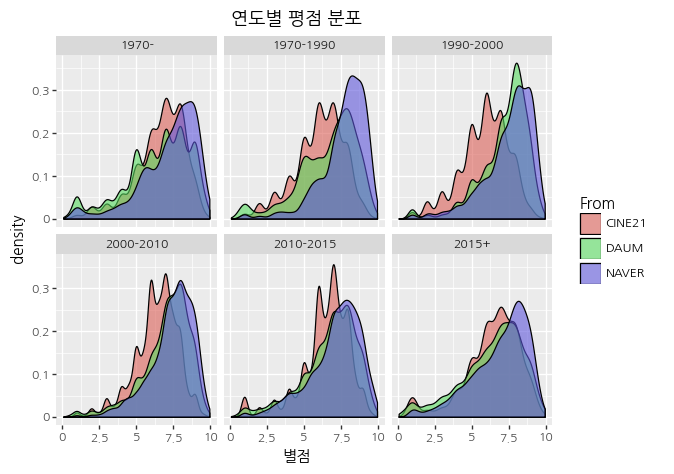

<ggplot: (-9223363282511124245)>

In [236]:
(
    ggplot(EDA[EDA.CAT연도!='nan'], aes(x='별점', fill='From'))
    + geom_density(aes(y='stat(density)'), alpha=0.6)
    + ggtitle("연도별 평점 분포")
    + facet_wrap('CAT연도', ncol = 3)
    + theme(text=element_text(family=font_name))

)

/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/plotnine/layer.py:369: PlotnineWarning: stat_density : Removed 11069 rows containing non-finite values.


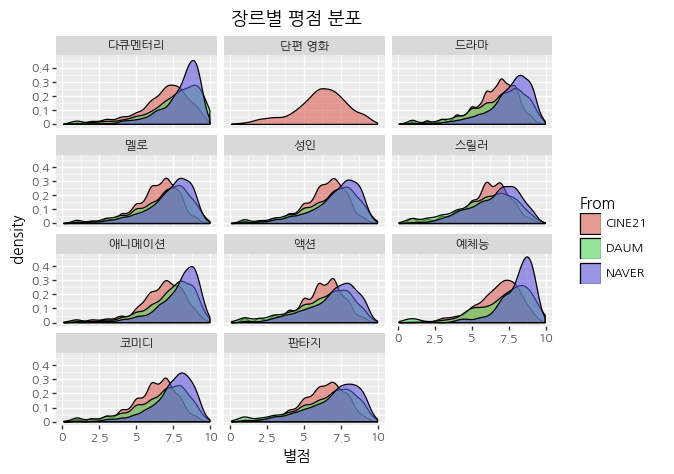

<ggplot: (8754343653752)>

In [232]:
(
    ggplot(EDA_G, aes(x='별점', fill='From'))
    + geom_density(aes(y='stat(density)'), alpha=0.6)
    + ggtitle("장르별 평점 분포")
    + facet_wrap('장르정리', ncol = 3)
    + theme(text=element_text(family=font_name))

)

# GDP, 평점

In [301]:
gdp['연도'] = gdp.분기.apply(lambda x: x[:4])

In [310]:
gdp.loc[:3, '실질GDP성장률'] = '0.0'

In [313]:
gdp['실질GDP성장률'] = gdp['실질GDP성장률'].apply(float)

In [320]:
gdp.groupby('연도')['실질GDP성장률'].mean().reset_index()

,연도,실질GDP성장률
0,1960,0.000
1,1961,6.825
2,1962,4.075
3,1963,9.100
4,1964,9.050
...,...,...
56,2016,2.950
57,2017,3.150
58,2018,2.900
59,2019,2.050


In [322]:
EDA_G = pd.merge(EDA_G, gdp.groupby('연도')['실질GDP성장률'].mean().reset_index(), how='left', on='연도')

In [335]:
EDA_G['S별점'] = EDA_G.별점/(max(EDA_G.별점) - min(EDA_G.별점))

In [336]:
EDA_G['SGDP'] =  EDA_G.실질GDP성장률/(max(EDA_G.실질GDP성장률) - min(EDA_G.실질GDP성장률))

In [341]:
EDA_G.장르정리.value_counts()

드라마      24676
액션       17112
스릴러      12754
코미디      11894
멜로        9671
성인        9408
판타지       8732
애니메이션     4469
다큐멘터리     2183
예체능       1318
단편 영화      601
Name: 장르정리, dtype: int64

In [349]:
EDA_G.groupby('장르정리').sample(frac=0.01)

,별점,장르,연도,From,CAT연도,장르정리,실질GDP성장률,S별점,SGDP
26867,7.83,다큐멘터리,2009,CINE21,2000-2010,다큐멘터리,0.775,0.793313,0.038896
4078,5.00,다큐멘터리,1996,CINE21,1990-2000,다큐멘터리,7.900,0.506586,0.396487
26527,NaN,"애니메이션, 다큐멘터리",1963,CINE21,1970-,다큐멘터리,9.100,NaN,0.456713
84210,7.41,다큐멘터리,2013,NAVER,2010-2015,다큐멘터리,3.150,0.750760,0.158093
85080,7.71,다큐멘터리,2013,NAVER,2010-2015,다큐멘터리,3.150,0.781155,0.158093
...,...,...,...,...,...,...,...,...,...
27240,NaN,"드라마, 로맨틱코미디, 멜로, 환상/SF",2010,CINE21,2010-2015,판타지,6.825,NaN,0.342535
36182,NaN,"액션, 코미디, 판타지",2018,CINE21,2015+,판타지,2.900,NaN,0.145546
101750,8.48,"드라마,공포,판타지",,NAVER,1970-,판타지,NaN,0.859169,NaN
11424,NaN,SF,1988,CINE21,1970-1990,판타지,12.100,NaN,0.607277


In [362]:
EDA_GD =  EDA_G.groupby('장르정리').sample(frac=0.01)

/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_point : Removed 257 rows containing missing values.
/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.


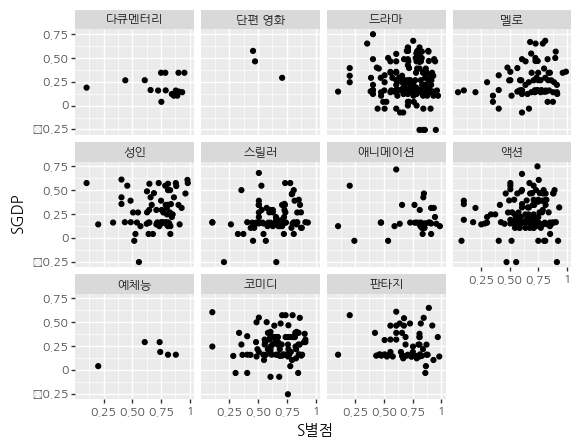

<ggplot: (8754443654969)>

In [363]:
(
    ggplot(data = EDA_GD) 
    +geom_point( aes(x = 'S별점', y = 'SGDP'))
    +theme(text=element_text(family=font_name))
    + facet_wrap('장르정리', ncol = 4)
    
)

/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_point : Removed 194 rows containing missing values.
/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.


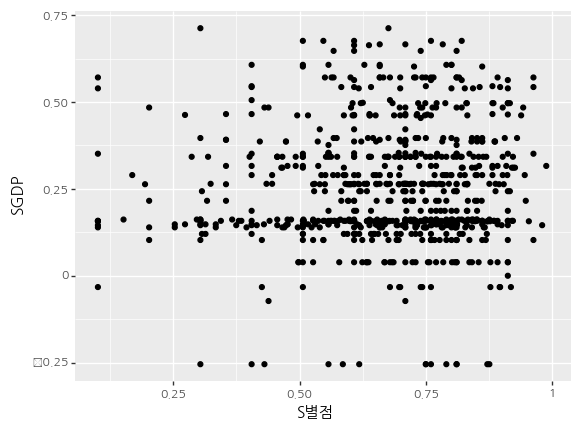

<ggplot: (8754362276563)>

In [354]:
(
    ggplot(data = EDA_GD[EDA_GD['장르정리']=='멜로']) 
    +geom_point( aes(x = 'S별점', y = 'SGDP'))
    +theme(text=element_text(family=font_name))
    #+ facet_wrap('장르정리', ncol = 1)
    
)

/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/plotnine/layer.py:464: PlotnineWarning: geom_point : Removed 311 rows containing missing values.
/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
/home/lds/anaconda3/envs/DL/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.


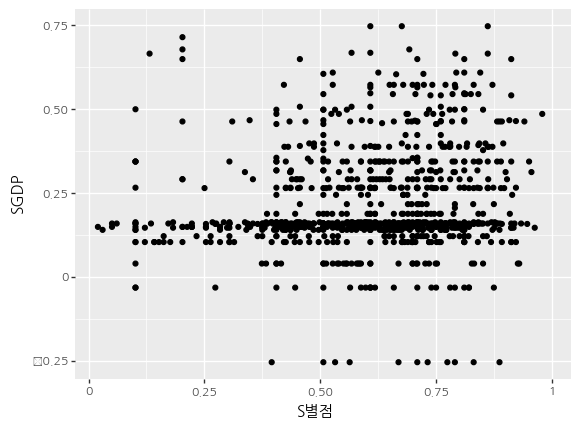

<ggplot: (8754439377114)>

In [356]:
(
    ggplot(data = EDA_GD[EDA_GD['장르정리']=='스릴러']) 
    +geom_point( aes(x = 'S별점', y = 'SGDP'))
    +theme(text=element_text(family=font_name))
    #+ facet_wrap('장르정리', ncol = 1)
    
)

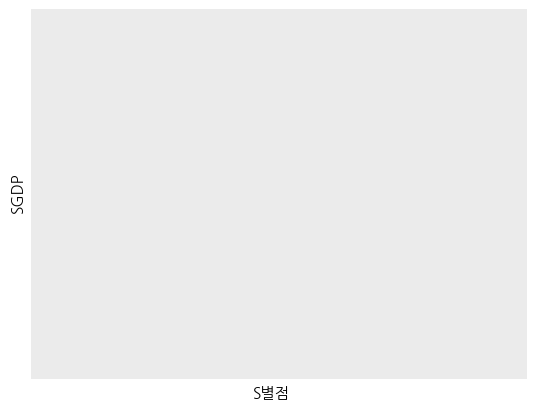

<ggplot: (-9223363282411060371)>

In [357]:
(
    ggplot(data = EDA_GD[EDA_GD['장르정리']=='로맨스']) 
    +geom_point( aes(x = 'S별점', y = 'SGDP'))
    +theme(text=element_text(family=font_name))
    #+ facet_wrap('장르정리', ncol = 1)
    
)